In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform as runif
from scipy import integrate
import BayesODE as bo

In [2]:
import os
os.chdir('C:\\Users\\mohan\\Documents\\probDE')

In [4]:
def f(x,t):
    return  3*(t+1/4) - x/(t+1/4)

a = 0
b = 4.75
x0_f1 = 10
N = 100
tseq1 = np.linspace(a, b, N)


In [5]:
from math import pi, sin, cos
def f2(x, t):
    return -x + sin(t)+ cos(t) 

a = 0
b = 6*pi
x0_f2 = 1
N = 100
tseq2 = np.linspace(a, b, N)


In [18]:
gammap = np.linspace(0.01, 10, 200)
alphap = np.linspace(10,10,1)

In [19]:
def tune(model, f, alphap, gammap, tseq, x0):
    x = integrate.odeint(f,x0,tseq)
    x = [i for l in x for i in l]
    minerr = float('inf')
    if model == "se":
        cov_vv = bo.cov_vv_se
        cov_xv = bo.cov_xv_se
        cov_xx = bo.cov_xx_se
    elif model == "ex":
        cov_vv = bo.cov_vv_ex
        cov_xv = bo.cov_xv_ex
        cov_xx = bo.cov_xx_ex
    elif model == "re":
        cov_vv = bo.cov_vv_re
        cov_xv = bo.cov_xv_re
        cov_xx = bo.cov_xx_re
    else:
        raise ValueError("Invalid covariance type.")
    for alpha in alphap:
        for gamma in gammap:
            try:
                Sigma_vv = cov_vv(tseq, tseq, gamma, alpha)
                Sigma_xx = cov_xx(tseq, tseq, gamma, alpha)
                Sigma_xv = cov_xv(tseq, tseq, gamma, alpha)
                xt1, _, _= bo.ode_bayes(f, tseq, x0, Sigma_vv, Sigma_xx, Sigma_xv)
                err = sum((xt1 - x)**2)
                if err < minerr:
                    minerr = err
                    mingamma = gamma
                    minalpha = alpha
            except:
                continue
    return minalpha, mingamma

In [20]:
alpha_exp2, gamma_exp2 = tune('se', f, alphap, gammap, tseq1, x0_f1)
alpha_exp, gamma_exp = tune('ex', f, alphap, gammap, tseq1, x0_f1)
alpha_rect, gamma_rect = tune('re', f, alphap, gammap, tseq1, x0_f1)

C:\Users\mohan\Documents\probDE\BayesODE\ode_bayes.py:50: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mu_x, Sigma_xx), mu_x, Sigma_xx


C:\Users\mohan\Documents\probDE\BayesODE\ode_bayes.py:50: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mu_x, Sigma_xx), mu_x, Sigma_xx


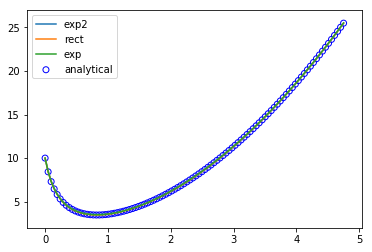

In [21]:
Sigma_vv = bo.cov_vv_se(tseq1, tseq1, gamma_exp2, alpha_exp2)
Sigma_xx = bo.cov_xx_se(tseq1, tseq1, gamma_exp2, alpha_exp2)
Sigma_xv = bo.cov_xv_se(tseq1, tseq1, gamma_exp2, alpha_exp2)
xt1,_,_ = bo.ode_bayes(f, tseq1, x0_f1, Sigma_vv, Sigma_xx, Sigma_xv)

Sigma_vv = bo.cov_vv_re(tseq1, tseq1, gamma_rect, alpha_rect)
Sigma_xx = bo.cov_xx_re(tseq1, tseq1, gamma_rect, alpha_rect)
Sigma_xv = bo.cov_xv_re(tseq1, tseq1, gamma_rect, alpha_rect)
xt2,_,_ = bo.ode_bayes(f, tseq1, x0_f1, Sigma_vv, Sigma_xx, Sigma_xv)

Sigma_vv = bo.cov_vv_ex(tseq1, tseq1, gamma_exp, alpha_exp)
Sigma_xx = bo.cov_xx_ex(tseq1, tseq1, gamma_exp, alpha_exp)
Sigma_xv = bo.cov_xv_ex(tseq1, tseq1, gamma_exp, alpha_exp)
xt3,_,_ = bo.ode_bayes(f, tseq1, x0_f1, Sigma_vv, Sigma_xx, Sigma_xv)

plt.plot(tseq1, xt1, label = 'exp2')
plt.plot(tseq1, xt2, label = 'rect')
plt.plot(tseq1, xt3, label = 'exp')
plt.legend(loc='upper left')

x = integrate.odeint(f,x0_f1,tseq1)
plt.scatter(tseq1, x, facecolor = 'none', edgecolor = 'b', label='analytical')
plt.legend(loc='upper left')
plt.show()

In [22]:
alpha_exp2, gamma_exp2 = tune('se', f2, alphap, gammap, tseq2, x0_f2)
alpha_exp, gamma_exp = tune('ex', f2, alphap, gammap, tseq2, x0_f2)
alpha_rect, gamma_rect = tune('re', f2, alphap, gammap, tseq2, x0_f2)

C:\Users\mohan\Documents\probDE\BayesODE\ode_bayes.py:50: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mu_x, Sigma_xx), mu_x, Sigma_xx


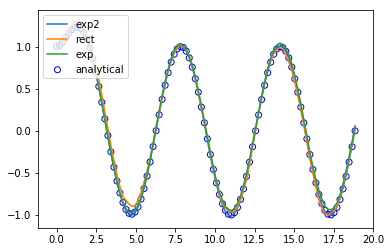

In [23]:
Sigma_vv = bo.cov_vv_se(tseq2, tseq2, gamma_exp2, alpha_exp2)
Sigma_xx = bo.cov_xx_se(tseq2, tseq2, gamma_exp2, alpha_exp2)
Sigma_xv = bo.cov_xv_se(tseq2, tseq2, gamma_exp2, alpha_exp2)
xt1,_,_ = bo.ode_bayes(f2, tseq2, x0_f2, Sigma_vv, Sigma_xx, Sigma_xv)

Sigma_vv = bo.cov_vv_re(tseq2, tseq2, gamma_rect, alpha_rect)
Sigma_xx = bo.cov_xx_re(tseq2, tseq2, gamma_rect, alpha_rect)
Sigma_xv = bo.cov_xv_re(tseq2, tseq2, gamma_rect, alpha_rect)
xt2,_,_ = bo.ode_bayes(f2, tseq2, x0_f2, Sigma_vv, Sigma_xx, Sigma_xv)

Sigma_vv = bo.cov_vv_ex(tseq2, tseq2, gamma_exp, alpha_exp)
Sigma_xx = bo.cov_xx_ex(tseq2, tseq2, gamma_exp, alpha_exp)
Sigma_xv = bo.cov_xv_ex(tseq2, tseq2, gamma_exp, alpha_exp)
xt3,_,_ = bo.ode_bayes(f2, tseq2, x0_f2, Sigma_vv, Sigma_xx, Sigma_xv)

plt.plot(tseq2, xt1, label = 'exp2')
plt.plot(tseq2, xt2, label = 'rect')
plt.plot(tseq2, xt3, label = 'exp')
plt.legend(loc='upper left')

x = integrate.odeint(f2,x0_f2,tseq2)
plt.scatter(tseq2, x, facecolor = 'none', edgecolor = 'b', label='analytical')
plt.legend(loc='upper left')
plt.show()

In [24]:
tmax = runif(low = 0, high = 10, size = 1)
gamma = gamma_exp2

tseq = np.linspace(start = 0, stop = tmax, num = N)
av_se = np.zeros((N, 1))
av2_se = np.zeros((N, 1))
av_ex = np.zeros((N, 1))
av2_ex = np.zeros((N, 1))
av_re = np.zeros((N, 1))
av2_re = np.zeros((N, 1))
for ii in range(0, N):
    av_se[ii] = bo.cov_vv_se(0, tseq[ii], gamma)/0.1
    av2_se[ii] = bo.cov_xx_se(tseq[ii], tseq[ii], gamma)
    av_ex[ii] = bo.cov_vv_ex(0, tseq[ii], gamma)
    av2_ex[ii] = bo.cov_xx_ex(tseq[ii], tseq[ii], gamma)
    av_re[ii] = bo.cov_vv_re(0, tseq[ii], gamma)/0.1
    av2_re[ii] = bo.cov_xx_re(tseq[ii], tseq[ii], gamma)
    
#Plots
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(3,2,1)
plt.plot(tseq,av_se)
plt.title('exp2')
plt.subplot(3,2,2)
plt.plot(tseq,av2_se)
plt.title('exp2')

plt.subplot(3,2,3)
plt.plot(tseq,av_ex)
plt.title('exp')
plt.subplot(3,2,4)
plt.plot(tseq,av2_ex)
plt.title('exp')

plt.subplot(3,2,5)
plt.plot(tseq,av_re)
plt.title('rect')
plt.subplot(3,2,6)
plt.plot(tseq,av2_re)
plt.title('rect')

TypeError: not enough arguments: expected 4, got 3

In [ ]:
tmax = runif(low = 0, high = 10, size = 1)
gamma = gamma_exp

tseq = np.linspace(start = 0, stop = tmax, num = N)
av_se = np.zeros((N, 1))
av2_se = np.zeros((N, 1))
av_ex = np.zeros((N, 1))
av2_ex = np.zeros((N, 1))
av_re = np.zeros((N, 1))
av2_re = np.zeros((N, 1))
for ii in range(0, N):
    av_se[ii] = bo.cov_vv_se(0, tseq[ii], gamma)
    av2_se[ii] = bo.cov_xx_se(tseq[ii], tseq[ii], gamma)
    av_ex[ii] = bo.cov_vv_ex(0, tseq[ii], gamma)
    av2_ex[ii] = bo.cov_xx_ex(tseq[ii], tseq[ii], gamma)
    av_re[ii] = bo.cov_vv_re(0, tseq[ii], gamma)
    av2_re[ii] = bo.cov_xx_re(tseq[ii], tseq[ii], gamma)
    
#Plots
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(3,2,1)
plt.plot(tseq,av_se)
plt.title('exp2')
plt.subplot(3,2,2)
plt.plot(tseq,av2_se)
plt.title('exp2')

plt.subplot(3,2,3)
plt.plot(tseq,av_ex)
plt.title('exp')
plt.subplot(3,2,4)
plt.plot(tseq,av2_ex)
plt.title('exp')

plt.subplot(3,2,5)
plt.plot(tseq,av_re)
plt.title('rect')
plt.subplot(3,2,6)
plt.plot(tseq,av2_re)
plt.title('rect')

In [ ]:
tmax = runif(low = 0, high = 10, size = 1)
gamma = gamma_rect

tseq = np.linspace(start = 0, stop = tmax, num = N)
av_se = np.zeros((N, 1))
av2_se = np.zeros((N, 1))
av_ex = np.zeros((N, 1))
av2_ex = np.zeros((N, 1))
av_re = np.zeros((N, 1))
av2_re = np.zeros((N, 1))
for ii in range(0, N):
    av_se[ii] = bo.cov_vv_se(0, tseq[ii], gamma)
    av2_se[ii] = bo.cov_xx_se(tseq[ii], tseq[ii], gamma)
    av_ex[ii] = bo.cov_vv_ex(0, tseq[ii], gamma)
    av2_ex[ii] = bo.cov_xx_ex(tseq[ii], tseq[ii], gamma)
    av_re[ii] = bo.cov_vv_re(0, tseq[ii], gamma)
    av2_re[ii] = bo.cov_xx_re(tseq[ii], tseq[ii], gamma)
    
#Plots
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(3,2,1)
plt.plot(tseq,av_se)
plt.title('exp2')
plt.subplot(3,2,2)
plt.plot(tseq,av2_se)
plt.title('exp2')

plt.subplot(3,2,3)
plt.plot(tseq,av_ex)
plt.title('exp')
plt.subplot(3,2,4)
plt.plot(tseq,av2_ex)
plt.title('exp')

plt.subplot(3,2,5)
plt.plot(tseq,av_re)
plt.title('rect')
plt.subplot(3,2,6)
plt.plot(tseq,av2_re)
plt.title('rect')